In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import math
from google.colab.patches import cv2_imshow
from skimage.util import random_noise
from PIL import Image
import random
import glob
from skimage.measure import compare_ssim,compare_mse,compare_psnr

# #Loading Image

In [ ]:
inp_img = cv2.imread('/content/drive/My Drive/Minor_6th_sem/black_n_white_image.jpeg')
gray_img = cv2.cvtColor(inp_img, cv2.COLOR_BGR2GRAY)

In [ ]:
gray_img.shape

(256, 256)

In [ ]:
gray_img

array([[254, 255, 255, ..., 224, 223, 223],
       [255, 255, 255, ..., 224, 224, 224],
       [249, 251, 253, ..., 225, 225, 225],
       ...,
       [ 49,  99,  78, ...,  91,  82,  61],
       [ 46,  55,  46, ...,  93,  88,  65],
       [ 42,  37,  41, ...,  89,  90,  75]], dtype=uint8)

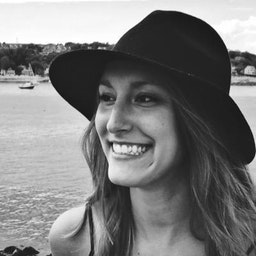

In [ ]:
cv2_imshow(gray_img)

#Adding Noise

In [ ]:
noise_img = gray_img.copy()

In [ ]:

noise = random_noise(noise_img, mode='s&p', amount=0.5)
noise = (255*noise).astype(np.uint8)
#noise_img = Image.fromarray(noise)

In [ ]:
noise

array([[255, 255, 255, ..., 224, 223, 223],
       [255,   0,   0, ..., 224,   0, 255],
       [  0, 251, 253, ..., 225, 225, 225],
       ...,
       [ 48,  99, 255, ..., 255,  81,  60],
       [ 46,  55,   0, ...,   0,  88,  65],
       [255,   0,   0, ...,   0,   0,  75]], dtype=uint8)

In [ ]:
m=4;
for x in range(0,noise.shape[0]-1):
    for y in range(0, noise.shape[1]-1):
      if(noise[x][y]==0):
        noise[x][y]=random.randint(0,m)
      elif(noise[x][y]==255):
        noise[x][y]=random.randint(255-m,255)

In [ ]:
noise

array([[253, 253, 255, ..., 224, 223, 223],
       [253,   2,   0, ..., 224,   4, 255],
       [  1, 251, 253, ..., 225, 225, 225],
       ...,
       [ 48,  99, 254, ..., 255,  81,  60],
       [ 46,  55,   4, ...,   0,  88,  65],
       [255,   0,   0, ...,   0,   0,  75]], dtype=uint8)

In [ ]:
noise_img = Image.fromarray(noise)

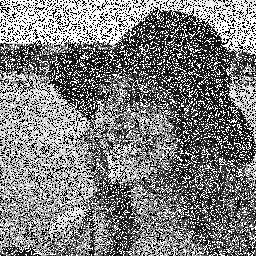

In [ ]:
noise_img

In [ ]:
noise_img.size

(256, 256)

In [ ]:
noise_img = np.asarray(noise_img)

In [ ]:
gray_img

array([[254, 255, 255, ..., 224, 223, 223],
       [255, 255, 255, ..., 224, 224, 224],
       [249, 251, 253, ..., 225, 225, 225],
       ...,
       [ 49,  99,  78, ...,  91,  82,  61],
       [ 46,  55,  46, ...,  93,  88,  65],
       [ 42,  37,  41, ...,  89,  90,  75]], dtype=uint8)

In [ ]:
noise_img

array([[253, 253, 255, ..., 224, 223, 223],
       [253,   2,   0, ..., 224,   4, 255],
       [  1, 251, 253, ..., 225, 225, 225],
       ...,
       [ 48,  99, 254, ..., 255,  81,  60],
       [ 46,  55,   4, ...,   0,  88,  65],
       [255,   0,   0, ...,   0,   0,  75]], dtype=uint8)

In [ ]:
noise_img.shape

(256, 256)

In [ ]:
noise_img.size

65536

In [ ]:
count3=0
for x in range(0,noise_img.shape[0]-1):
    for y in range(0, noise_img.shape[1]-1):
      if(noise_img[x][y]!=gray_img[x][y]):
        count3+=1;
count3

36903

#Padding

In [ ]:
#edge_padding for 3 extra edges
padded_img=np.pad(noise_img,3,mode='edge')

In [ ]:
padded_img

array([[253, 253, 253, ..., 223, 223, 223],
       [253, 253, 253, ..., 223, 223, 223],
       [253, 253, 253, ..., 223, 223, 223],
       ...,
       [255, 255, 255, ...,  75,  75,  75],
       [255, 255, 255, ...,  75,  75,  75],
       [255, 255, 255, ...,  75,  75,  75]], dtype=uint8)

In [ ]:
padded_img.shape

(262, 262)

#Detection

In [ ]:
noisy_pixels = padded_img.copy()

In [ ]:
padded_img.shape[0]

262

In [ ]:
padded_img.shape[1]

262

In [ ]:
#LEVEL 1:
no_of_noisy_pixels=0;
no_of_noise_free_pixels=0;
i=0;
for x in range(3,padded_img.shape[0]-3):
    for y in range(3, padded_img.shape[1]-3):
      print('pixel',i);
      i+=1;
      cp=padded_img[x][y];
      #Step 1:
      mean_a=0;
      standard_deviation_a=0;
      for m in range(x-2,x+3):
        for n in range(y-2,y+3):
          if(((x==m) and (y==n))):
            mean_a=mean_a+0;
          else:
            mean_a=mean_a+padded_img[m,n];
      mean_a=mean_a/24;
      for m in range(x-2,x+3):
        for n in range(y-2,y+3):
          if(((x==m) and (y==n))):
            standard_deviation_a=standard_deviation_a+0;
          else:
            standard_deviation_a=standard_deviation_a+pow((padded_img[m,n]-mean_a),2);
      standard_deviation_a=standard_deviation_a/24;
      standard_deviation_a=math.sqrt(standard_deviation_a);
      
#***************************************************************************************************#
      
      #Step 2 and 3:
      mean_p=0;
      standard_deviation_p=0;
      for m in range(x-2,x+3):
        for n in range(y-2,y+3):
          if(((x==m) and (y==n))):
            mean_p=mean_p+0;
          else:
            mean_p=mean_p+abs((mean_a-padded_img[m,n]));
      mean_p=mean_p/24;
      for m in range(x-2,x+3):
        for n in range(y-2,y+3):
          if(((x==m) and (y==n))):
            standard_deviation_p=standard_deviation_p+0;
          else:
            standard_deviation_p=standard_deviation_p+pow((padded_img[m,n]-mean_p),2);
      standard_deviation_p=standard_deviation_p/24;
      standard_deviation_p=math.sqrt(standard_deviation_p);
      T1=mean_p+standard_deviation_p;

#********************************************************************************************************#
      
      #Step 4 and 5:
      mean_q=0;
      for m in range(x-2,x+3):
        for n in range(y-2,y+3):
          if(((x==m) and (y==n))):
            mean_q=mean_q+0;
          else:
            mean_q=mean_q+abs((cp-padded_img[m,n]));
      mean_q=mean_q/24;
      NS=mean_q;

#********************************************************************************************************#
     
      #Step 6:
      
      if((NS>T1) and ((cp<=m) or (cp>=255-m))):
        print(cp,'is noisy');
        noisy_pixels[x][y]=0;
        no_of_noisy_pixels+=1;

#Level 2:

      #Step 7:
      else:
        T2_min=mean_a-(0.5*standard_deviation_a);
        T2_max=mean_a+(0.5*standard_deviation_a);

      #Step 8:
        if((cp<=T2_min or cp>=T2_max) and (cp<=m or cp>=255-m)):
          print(cp,'is noisy');
          noisy_pixels[x][y]=0;
          no_of_noisy_pixels+=1;
      #Step 9:
        else:

#Level 3:
          li=[];
          for m in range(x-2,x+3):
            for n in range(y-2,y+3):
              if((x==m) and (y==n)):
                continue; 
              else:
                li.append(padded_img[m][n]);
          li.sort();       
          N=24;
          Q1=int((N+1)/4);
          Q3=int((3*(N+1))/4);
          
          T3_min=li[Q1];
          T3_max=li[Q3];
          #Step 10:
          if((cp<=T3_min or cp>=T3_max) and (cp<=m or cp>=255-m)):
            print(cp,'is noisy');
            noisy_pixels[x][y]=0;
            no_of_noisy_pixels+=1;
          else:
            print(cp,'is noise-free');
            no_of_noise_free_pixels+=1;

pixel 0
253 is noisy
pixel 1
253 is noisy
pixel 2
255 is noisy
pixel 3
255 is noisy
pixel 4
4 is noisy
pixel 5
253 is noisy
pixel 6
253 is noisy
pixel 7
254 is noisy
pixel 8
251 is noisy
pixel 9
2 is noisy
pixel 10
252 is noisy
pixel 11
252 is noisy
pixel 12
253 is noisy
pixel 13
254 is noisy
pixel 14
253 is noisy
pixel 15
253 is noise-free
pixel 16
254 is noisy
pixel 17
254 is noise-free
pixel 18
255 is noisy
pixel 19
255 is noisy
pixel 20
255 is noisy
pixel 21
253 is noise-free
pixel 22
251 is noise-free
pixel 23
254 is noisy
pixel 24
253 is noisy
pixel 25
252 is noisy
pixel 26
252 is noisy
pixel 27
4 is noisy
pixel 28
3 is noisy
pixel 29
252 is noisy
pixel 30
253 is noisy
pixel 31
3 is noisy
pixel 32
255 is noisy
pixel 33
251 is noisy
pixel 34
253 is noisy
pixel 35
2 is noisy
pixel 36
1 is noisy
pixel 37
251 is noisy
pixel 38
255 is noisy
pixel 39
252 is noisy
pixel 40
3 is noisy
pixel 41
251 is noisy
pixel 42
1 is noisy
pixel 43
255 is noisy
pixel 44
253 is noisy
pixel 45
0 is nois

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in ubyte_scalars


Streaming output truncated to the last 5000 lines.
252 is noisy
pixel 63037
113 is noise-free
pixel 63038
1 is noisy
pixel 63039
254 is noisy
pixel 63040
117 is noise-free
pixel 63041
116 is noise-free
pixel 63042
4 is noisy
pixel 63043
113 is noise-free
pixel 63044
113 is noise-free
pixel 63045
112 is noise-free
pixel 63046
251 is noisy
pixel 63047
3 is noisy
pixel 63048
120 is noise-free
pixel 63049
117 is noise-free
pixel 63050
121 is noise-free
pixel 63051
121 is noise-free
pixel 63052
2 is noisy
pixel 63053
131 is noise-free
pixel 63054
251 is noisy
pixel 63055
253 is noisy
pixel 63056
134 is noisy
pixel 63057
140 is noise-free
pixel 63058
147 is noise-free
pixel 63059
253 is noisy
pixel 63060
159 is noise-free
pixel 63061
252 is noisy
pixel 63062
1 is noisy
pixel 63063
161 is noisy
pixel 63064
251 is noisy
pixel 63065
253 is noisy
pixel 63066
1 is noisy
pixel 63067
39 is noisy
pixel 63068
38 is noisy
pixel 63069
46 is noisy
pixel 63070
3 is noisy
pixel 63071
154 is noise-free
pix

In [ ]:
no_of_noisy_pixels

45522

In [ ]:
no_of_noise_free_pixels

20014

In [ ]:
ct=0;
for x in range(3,padded_img.shape[0]-3):
    for y in range(3, padded_img.shape[1]-3):
      if(noisy_pixels[x][y]==0):
        ct+=1;
ct

45522

In [ ]:
padded_img.shape[0]-3

259

#Filtering

In [ ]:
noisy_pixels

array([[253, 253, 253, ..., 223, 223, 223],
       [253, 253, 253, ..., 223, 223, 223],
       [253, 253, 253, ..., 223, 223, 223],
       ...,
       [255, 255, 255, ...,  75,  75,  75],
       [255, 255, 255, ...,  75,  75,  75],
       [255, 255, 255, ...,  75,  75,  75]], dtype=uint8)

In [ ]:
def pixel_is_noisy(x,y):
  if(noisy_pixels[x][y]==0):
       return 1;
  else:
       return 0;

def check_noise_in_3b3(x,y):
  for m in range(x-1,x+2):
    for n in range(y-1,y+2):
      if(noisy_pixels[m][n]==0):
        continue;
      else:
        return 1;
  return 0;

def check_noise_in_5b5(x,y):
  for m in range(x-2,x+3):
    for n in range(y-2,y+3):
      if(noisy_pixels[m][n]==0):
        continue;
      else:
        return 1;
  return 0;


def check_noise_in_7b7(x,y):
  for m in range(x-3,x+4):
    for n in range(y-3,y+4):
      if(noisy_pixels[m][n]==0):
        continue;
      else:
        return 1;
  return 0;


def weight(m,n,x,y):
  diff=abs(padded_img[m][n]-padded_img[x][y])
  if(diff<5):
    wt=3;
  elif(diff<10):
    wt=2;
  else:
    wt=1;
  return wt;


T1=10;
T2=30;
def fuzzy(max):
  if(max<T1):
    ff=0;
  elif(max>=T2):
    ff=1;
  else:
    ff=(max-T1)/(T2-T1);
  return ff;

In [ ]:
filtered_img=padded_img.copy();
#Step 1 and 2:
noise_free_pixels=[]
for x in range(3,padded_img.shape[0]-3):
    for y in range(3, padded_img.shape[1]-3):
      noise_free_pixels.clear();
      max=0;
      if(pixel_is_noisy(x,y)):   #check central pixel
        for m in range(x-1,x+2):
            for n in range(y-1,y+2):
              if((m==x) and (n==y)):
                continue;
              else:
                diff=abs(padded_img[m][n]-padded_img[x][y]);
                if(diff>max):
                  max=diff;
       #*************************************************************************************************#
#Step 3:
        ff=fuzzy(max);
        
        if(check_noise_in_3b3(x,y)): #search for noise free pixels in 3*3 matrix
          for m in range(x-1,x+2):
            for n in range(y-1,y+2):
              if(pixel_is_noisy(m,n)):
                continue;
              else:
                wt=weight(m,n,x,y);
                noise_free_pixels.append(wt*padded_img[m][n]);
        elif(check_noise_in_5b5(x,y)):   #search for noise free pixels in 5*5 matrix
          for m in range(x-2,x+3):
            for n in range(y-2,y+3):
              if(pixel_is_noisy(m,n)):
                continue;
              else:
                wt=weight(m,n,x,y);
                noise_free_pixels.append(wt*padded_img[m][n]);
        elif(check_noise_in_7b7(x,y)):    #search for noise free pixels in 7*7 matrix
          for m in range(x-3,x+4):
            for n in range(y-3,y+4):
              if(pixel_is_noisy(m,n)):
                continue;
              else:
                wt=weight(m,n,x,y);
                noise_free_pixels.append(wt*padded_img[m][n]);
        else:
          wt=weight(x-1,y-1,x,y);
          noise_free_pixels.append(wt*padded_img[x-1][y-1]);
          wt=weight(x,y-1,x,y);
          noise_free_pixels.append(wt*padded_img[x][y-1]);
          wt=weight(x-1,y,x,y);
          noise_free_pixels.append(wt*padded_img[x-1][y]);
          wt=weight(x,y,x,y);
          noise_free_pixels.append(wt*padded_img[x][y]);
        
        noise_free_pixels.sort();
        MED=noise_free_pixels[int(len(noise_free_pixels)/2)];
        restoration_term=((1-ff)*padded_img[x][y])+(ff*MED);
        filtered_img[x][y]=restoration_term;

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in ubyte_scalars


In [ ]:
unpadded_filtered_img=gray_img.copy()
for x in range(3,padded_img.shape[0]-3):
    for y in range(3, padded_img.shape[1]-3):
      unpadded_filtered_img[x-3][y-3]=filtered_img[x][y]

In [ ]:
unpadded_filtered_img

array([[253, 253, 253, ..., 224, 223, 223],
       [247, 253, 253, ..., 224, 224, 225],
       [ 12, 241, 241, ..., 225, 225, 225],
       ...,
       [ 99,  99,  99, ...,  81,  81, 123],
       [144,  99,  83, ...,  88,  88,  81],
       [253, 255,  44, ..., 255,  88, 225]], dtype=uint8)

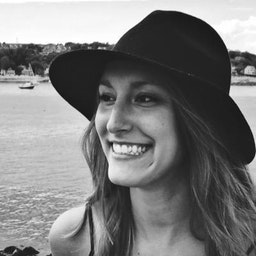

In [ ]:
cv2_imshow(gray_img)

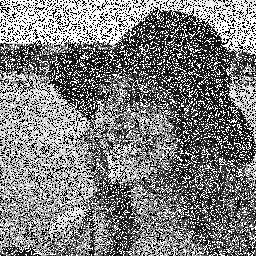

In [ ]:
cv2_imshow(noise_img)

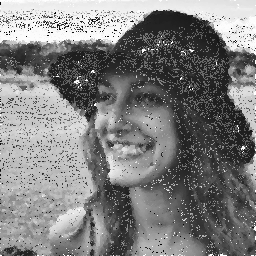

In [ ]:
cv2_imshow(unpadded_filtered_img)

In [ ]:
mse=(compare_mse(gray_img,unpadded_filtered_img))
psnr=(compare_psnr(gray_img,unpadded_filtered_img))
ssim=(compare_ssim(gray_img,unpadded_filtered_img))   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_mse has been moved to skimage.metrics.mean_squared_error. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print("MSE:",mse,end="  ")
print("PSNR:",psnr,end="  ")
print("SSIM:",ssim)

MSE: 1331.0471496582031  PSNR: 16.888869211154727  SSIM: 0.3556387824096178


In [ ]:
compare_mse(gray_img,unpadded_filtered_img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_mse has been moved to skimage.metrics.mean_squared_error. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.


1331.0471496582031

In [ ]:
compare_psnr(gray_img,unpadded_filtered_img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.


16.888869211154727

In [ ]:
(score, diff) = compare_ssim(gray_img,unpadded_filtered_img,full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.3556387824096178


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.


In [ ]:
#MSE
# sum=0
# M=gray_img.shape[0]
# N= gray_img.shape[1]
# for x in range(0,M):
#     for y in range(0,N):
#       sum=sum+pow(unpadded_filtered_img[x][y]-gray_img[x][y],2)

# MSE=sum/(M*N)
# MSE

In [ ]:
#PSNR
# PSNR=10*(math.log((pow(255,2)/MSE),10))

# PSNR

In [ ]:
#SSIM
#(score, diff) = compare_ssim(gray_img,unpadded_filtered_img,full=True)
#diff = (diff * 255).astype("uint8")
#print("SSIM: {}".format(score),end=" ")

In [ ]:
#cv2.imshow("Mean Fltered Image", inp_img1)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# import cv2
# import math
# from google.colab.patches import cv2_imshow
# from skimage.util import random_noise
# from PIL import Image
# import random
# import glob
# from skimage.measure import compare_ssim,compare_mse,compare_psnr
# count=0
# for img in glob.glob("/content/drive/My Drive/Minor_6th_sem/tid2008/*.bmp"):
#   print(img,end=" ")
#   count+=1
#   inp_img= cv2.imread(img)
#   gray_img = cv2.cvtColor(inp_img, cv2.COLOR_BGR2GRAY)
#   print("shape : ",gray_img.shape,end=" ")
#   print("size :", gray_img.size)
#   #cv2_imshow(gray_img)
# print("Count :",count)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Minor_6th_sem/tid2008/IMG0011.bmp shape :  (2048, 3072) size : 6291456
/content/drive/My Drive/Minor_6th_sem/tid2008/IMG0035.bmp shape :  (137, 183) size : 25071
/content/drive/My Drive/Minor_6th_sem/tid2008/IMG0012.bmp shape :  (2048, 3072) size : 6291456
/content/drive/My Drive/Minor_6th_sem/tid2008/IMG0013.bmp shape :  (2048, 3072) size : 6291456
/content/drive/My Drive/Minor_6th_sem/tid2008/IMG0014.bmp shape :  (2048, 3072) size : 6291456
/content/drive/My Drive/Minor_6th_sem/tid2008/IMG0015.bmp shape :  (2048, 3072) size : 6291456
/content/drive/My Drive/Minor_6th_sem/tid2008/IMG0016.bmp shape :  (2048, 3072) size : 6291456
/content/drive/My Drive/Minor_6th_sem/tid2008/IMG0017.bmp shape :  (3072, 2048) size : 6291456
/content/drive/My Drive/Minor_6th_sem/tid2008/IMG0018.bmp shape :  (3072, 2048) size : 6291456
/content/drive/My Dr